# Preprocessing age and gender

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv("age_gender_bkts.csv")
df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


## File organization
- age_groups : from 0 to 100+, 5 years old size
- Country destination : there are 12 countries with the following mapping:
    - 'AU' = Australia
    - 'ES' = Spain
    - 'PT' = Portugal
    - 'US' = USA
    - 'FR' = France
    - 'CA' = Canada
    - 'GB' = Great Britain
    - 'IT' = Italy
    - 'NL' = Netherlands
    - 'DE' = Germany
    - 'NDF'= No distantion found

## Proportion of travelers given the age group and sex per country
proportion = number of travelers / total travelers in **this** country

**Assumption about age**
We see that there are users that are below 15 years old and above 90 years old.  They do not make sense and this data is probably false.
We are going to remove ages above 90 and below 15 years old.

In [7]:
df_2= df.drop(df.ix[df['age_bucket'].isin(['0-4','5-9','10-14','90-94','95-99','100+'])].index, inplace= False)

Destination of people considering there age : *df_destination_age*

Total of travelers per country : *df_destination_total*

In [8]:
# remove  year
df_2.drop(['year'],axis=1,inplace = True)

# Compute number of people by age (previously, people were characterized by age AND sex)
df_destination_age = df_2.groupby(['country_destination','age_bucket','gender'],as_index=False).sum()

# Compute total number of people by country 
df_destination_total = df_destination_age.groupby('country_destination').sum().reset_index()

# Incorpore total in the df_destination_age dataframe
df_destination_age = df_destination_age.merge(df_destination_total, on='country_destination')
df_destination_age=df_destination_age.rename(columns = {'population_in_thousands_y':'population_total_in_thousands','population_in_thousands_x':'population_in_thousands'})

# Compute share of people by age and destination 
df_destination_age['proportion_%']=np.round(df_destination_age['population_in_thousands']/df_destination_age['population_total_in_thousands']*100, decimals=1)

# Index dataframe by country of destination then age
df_destination_age_male = df_destination_age.loc[df_destination_age['gender'] == 'male']
df_destination_age_female = df_destination_age.loc[df_destination_age['gender'] == 'female']

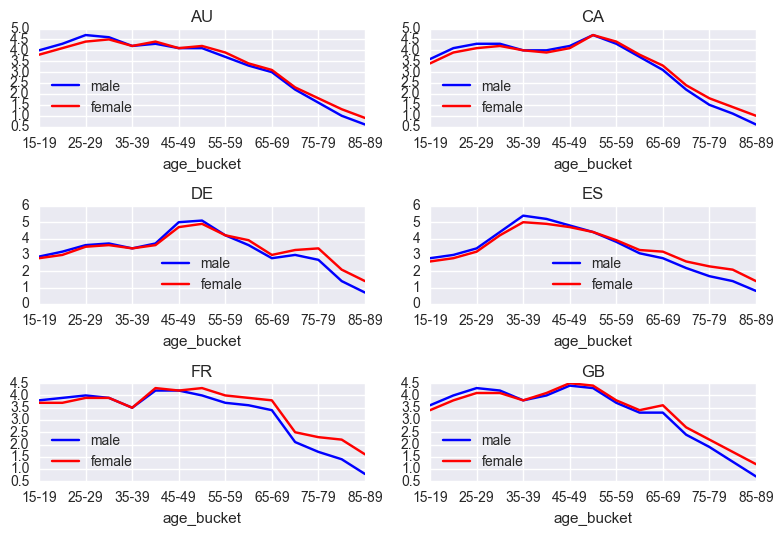

In [9]:
#male in blue
fig, axes = plt.subplots(nrows=3, ncols=2)
for (i, group), ax in zip(df_destination_age_male.groupby("country_destination"), axes.flat):
    group.plot(x='age_bucket', y="proportion_%", title=str(i),ax=ax ,kind='line',color='b',label='male' )
plt.tight_layout()

#female in red
for (i, group), ax in zip(df_destination_age_female.groupby("country_destination"), axes.flat):
    group.plot(x='age_bucket', y="proportion_%", title=str(i),ax=ax ,kind='line',color='r',label='female')
plt.tight_layout()

## Number of travelers given the age group and sex per country
number is in thousand

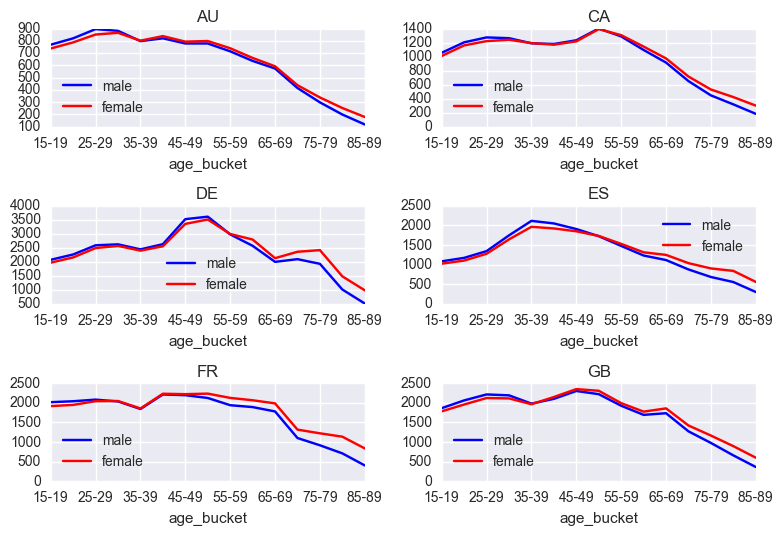

In [12]:
#male in blue
fig, axes = plt.subplots(nrows=3, ncols=2)
for (i, group), ax in zip(df_destination_age_male.groupby("country_destination"), axes.flat):
    group.plot(x='age_bucket', y="population_in_thousands", title=str(i),ax=ax ,kind='line',color='b',label='male' )
plt.tight_layout()

#female in red
for (i, group), ax in zip(df_destination_age_female.groupby("country_destination"), axes.flat):
    group.plot(x='age_bucket', y="population_in_thousands", title=str(i),ax=ax ,kind='line',color='r',label='female')
plt.tight_layout()

## Destination of travelers

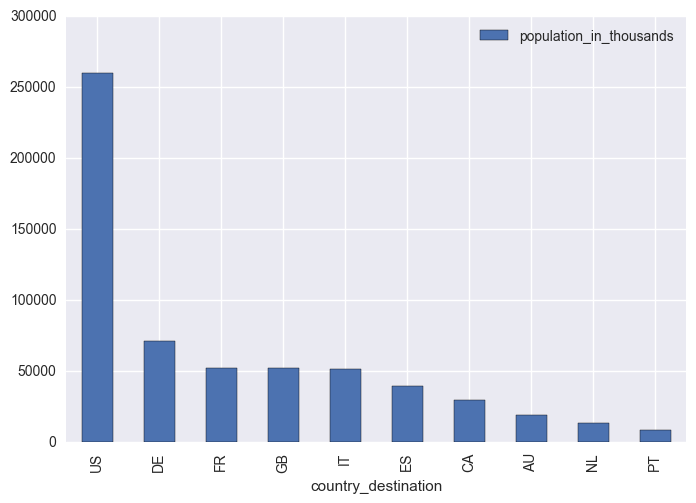

In [10]:
df_destination_total.sort_values('population_in_thousands',ascending=False).plot(x='country_destination', y='population_in_thousands',kind='bar')

In [13]:
df_destination_age.head()

,country_destination,age_bucket,gender,population_in_thousands,population_total_in_thousands,proportion_%
0,AU,15-19,female,737.0,19159.0,3.8
1,AU,15-19,male,768.0,19159.0,4.0
2,AU,20-24,female,787.0,19159.0,4.1
3,AU,20-24,male,820.0,19159.0,4.3
4,AU,25-29,female,851.0,19159.0,4.4
